In [1]:
import jieba
import pandas as pd
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

In [2]:
# 读入处理好的数据
df = pd.read_csv('../data/douban_processed.csv')

# 预览数据
df.head(5)

,c_date_time,p_name,p_url,c_data,c_rank,c_recom,c_date,c_time,c_rank_num
0,2018-01-19 18:17:25,王大根,https://www.douban.com/people/diewithme/,在这种家庭里做一条狗都好啊\n,力荐,6463,2018-01-19,18:17:25,5
1,2017-11-25 02:12:27,李阿斗,https://www.douban.com/people/gailsylee/,当时出国以后的第一最大感受就是尊重，不论老弱病孕还是任何“与众不同”，都不会有人上下打量你...,力荐,3429,2017-11-25,02:12:27,5
2,2017-12-06 15:10:45,光明小卖部,https://www.douban.com/people/gooooooooooohe/,所有人都知道是化妆只有我一个人以为请的真实病人出演吗。。。\n,力荐,3349,2017-12-06,15:10:45,5
3,2017-11-24 15:57:52,同志亦凡人中文站,https://www.douban.com/people/3540441/,有种糖放多了的感觉，精华基本都在预告里了。但对孩子们的纯真友情毫无抵抗力啊，就像被温柔的抚...,推荐,1814,2017-11-24,15:57:52,4
4,2018-01-19 14:18:28,桃桃淘电影,https://www.douban.com/people/qijiuzhiyue/,其实这更像当代童话，因为，实在是太暖了。里面每个人都那么暖，怎么可以那么暖，怎么可以那么暖...,推荐,1711,2018-01-19,14:18:28,4


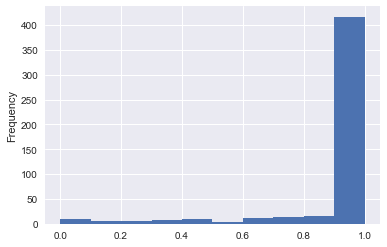

In [3]:
# 分析评论文本

# 情感分析
def get_sentiments(origin_s):
    s = SnowNLP(origin_s)
    return s.sentiments


df['c_sentiments'] = df['c_data'].apply(get_sentiments)
df['c_sentiments'].plot.hist()
plt.savefig('../data/positive.png')

In [4]:
# 全部评论的关键字
all_comments = ''.join(df['c_data'])
all_snow = SnowNLP(all_comments)
keywords = all_snow.keywords(30)
keywords

['不',
 '人',
 '都',
 '很',
 '一个',
 '电影',
 '小',
 '好',
 '看',
 '故事',
 '里',
 '会',
 '太',
 '中',
 '男孩',
 '孩子',
 '还',
 '世界',
 '善良',
 '家庭',
 '最',
 '说',
 '更',
 '去',
 '上',
 '姐姐',
 '没',
 '成长',
 '视角',
 '朋友']

In [5]:
# 摘要
summary = all_snow.summary(3)
summary

['故事里每个人的结局都很好', '大家都不是一个人', '每个人都有故事每个人都有视角每个人都有选择']

In [6]:
# 其他应用机器学习进行探索...

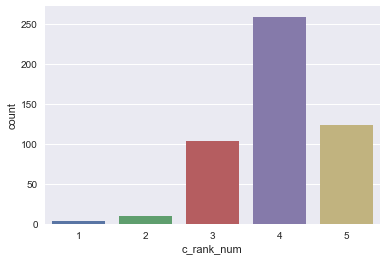

In [7]:
# 简单的可视化
sns.countplot('c_rank_num', data=df)
plt.savefig('../data/rank.png')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.011 seconds.
Prefix dict has been built succesfully.


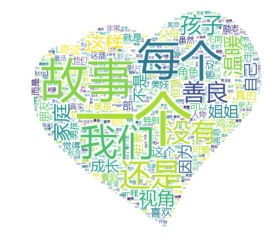

In [8]:
# 词云
def get_wordCloud(mylist):
    word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist]
    new_text = ' '.join(word_list)
    pic_path = '../data/heart.png'
    img_mask = imread(pic_path)

    stopwords = set(STOPWORDS)
    stopwords.add("电影")
    wordcloud = WordCloud(background_color="white", max_words=2000, font_path='/home/shensir/Downloads/msyh.ttc',
                          mask=img_mask, stopwords=stopwords).generate(new_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('../data/wordcloud.png')
    

get_wordCloud(df['c_data'])